In [1]:
# In this nbk we'll study the difference between progressive and conservative belief networks.
%load_ext autoreload
%autoreload 2
from source_code.loaders.import_gss import import_dataset
from source_code.loaders.clean_raw_data import clean_datasets
#df, _ = import_dataset()
cleaned_df = clean_datasets()

Loading dataset from from cache...
Done! ✨


In [2]:
# First we want to identify a large set of nodes that recurr across the full timespan of the GSS. 
from source_code.generators.corr_make_network import calculate_correlation_matrix
from source_code.generators.corr_make_network import CorrelationMethod, EdgeSuppressionMethod

BN_dict = {}

for start_year in range(1960, 2020, 2):
    timeframe = list(range(start_year, start_year+4))
    print("Loading BN for years:",timeframe)

    corr_matrix = calculate_correlation_matrix(
        cleaned_df, 
        years_of_interest=timeframe,
        method=CorrelationMethod.SPEARMAN, 
        partial=True, 
        edge_suppression=EdgeSuppressionMethod.REGULARIZATION,
        suppression_params={'regularization': 0.2},
        verbose=False
        )
    
    if corr_matrix is not None: 
        BN_dict[start_year] = corr_matrix
    


Loading BN for years: [1960, 1961, 1962, 1963]
This df is all NaNs. Have you selected a valid year?
Loading BN for years: [1962, 1963, 1964, 1965]
This df is all NaNs. Have you selected a valid year?
Loading BN for years: [1964, 1965, 1966, 1967]
This df is all NaNs. Have you selected a valid year?
Loading BN for years: [1966, 1967, 1968, 1969]
This df is all NaNs. Have you selected a valid year?
Loading BN for years: [1968, 1969, 1970, 1971]
This df is all NaNs. Have you selected a valid year?
Loading BN for years: [1970, 1971, 1972, 1973]
Loading BN for years: [1972, 1973, 1974, 1975]
Loading BN for years: [1974, 1975, 1976, 1977]
Loading BN for years: [1976, 1977, 1978, 1979]
Loading BN for years: [1978, 1979, 1980, 1981]
Loading BN for years: [1980, 1981, 1982, 1983]
Loading BN for years: [1982, 1983, 1984, 1985]
Loading BN for years: [1984, 1985, 1986, 1987]
Loading BN for years: [1986, 1987, 1988, 1989]
Loading BN for years: [1988, 1989, 1990, 1991]
Loading BN for years: [1990, 1

In [3]:
# Find the intersection of the variables in all BNs from a given start year
start_year = 1984
intersection = set(BN_dict[start_year].columns)

print(f"{len(intersection)} variables in {start_year}: {intersection}")

for year in BN_dict:
    if year < start_year:
        continue
    intersection = intersection.intersection(set(BN_dict[year].columns))
    print(f"The year {year} has {len(BN_dict[year].columns)} variables and shares {len(intersection)} variables with the previous year")

# Print final intersection size and variables
print(f"Final intersection size: {len(intersection)}")
print(f"Final intersection variables: {intersection}")


102 variables in 1984: {'SPKMIL', 'LIBRAC', 'NATSOC', 'COLHOMO', 'COLATH', 'WORKHARD', 'SUICIDE1', 'RELIG_Other', 'RELIG_Jewish', 'CONEDUC', 'LETDIE1', 'WOULDVOTELAST_DEMREP', 'TRUST', 'DIDVOTELAST', 'POLHITOK', 'HELPPOOR', 'NATPARK', 'ABHLTH', 'CONARMY', 'THNKSELF', 'NATSPACY', 'SPKATH', 'NATDRUGY', 'NATENVIY', 'ABRAPE', 'RACDIF3', 'NATRACEY', 'NATARMSY', 'GUNLAW', 'FEPRESCH', 'CONCLERG', 'SPKCOM', 'CONSCI', 'PORNLAW', 'CONTV', 'NATROAD', 'FEPOL', 'GETAHEAD', 'POLMURDR', 'COLMIL', 'NATFAREY', 'GRASS', 'CONMEDIC', 'SPKHOMO', 'SEXEDUC', 'FEFAM', 'SUICIDE2', 'OBEY', 'POPULAR', 'WOULDVOTELAST_NONCONFORM', 'RELIG_Protestant', 'COURTS', 'NATCRIMY', 'POLVIEWS', 'ABPOOR', 'COLRAC', 'POSTLIFE', 'CONPRESS', 'RELIG_None', 'EQWLTH', 'POLATTAK', 'ABDEFECT', 'CONLABOR', 'DIVLAW', 'RACDIF4', 'SPKRAC', 'POLESCAP', 'CONLEGIS', 'CONFED', 'NATAIDY', 'CONJUDGE', 'RELIG_Catholic', 'HELPOTH', 'FECHLD', 'HOMOSEX', 'PREMARSX', 'LIBMIL', 'CAPPUN', 'PARTYID', 'HELPNOT', 'CONBUS', 'NATEDUCY', 'FAIR', 'PRESLAST_

In [4]:
# The final intersection is the set of variables that are present in all BNs from 1984 to the present.
# They are:
recurring_variables_84 = ['PREMARSX', 'DIDVOTELAST', 'PORNLAW', 'LIBMIL', 'HELPBLK', 'SPKCOM', 'GRASS', 'LIBHOMO', 'COLRAC', 'XMARSEX', 
                          'RACDIF1', 'CAPPUN', 'RACDIF2', 'HELPPOOR', 'FEFAM', 'COLHOMO', 'LETDIE1', 'OBEY', 'CONCLERG', 'CONTV', 'SPKATH', 
                          'SUICIDE2', 'COLCOM', 'GUNLAW', 'LIBATH', 'FECHLD', 'HELPFUL', 'POSTLIFE', 'PARTYID', 'COLATH', 'RELIG_Jewish', 
                          'FAIR', 'HOMOSEX', 'CONLEGIS', 'COLMIL', 'CONEDUC', 'CONFINAN', 'POLABUSE', 'THNKSELF', 'FEPRESCH', 'POLATTAK', 
                          'CONBUS', 'CONMEDIC', 'WORKHARD', 'ABNOMORE', 'COURTS', 'ABDEFECT', 'ABPOOR', 'POLESCAP', 'HELPOTH', 'ABSINGLE', 
                          'RACDIF3', 'HELPNOT', 'POPULAR', 'NATSOC', 'LIBCOM', 'LIBRAC', 'SPKMIL', 'CONARMY', 'WOULDVOTELAST_NONCONFORM', 
                          'POLMURDR', 'CONJUDGE', 'GETAHEAD', 'ABANY', 'RACDIF4', 'ABRAPE', 'POLHITOK', 'SPKHOMO', 'CONLABOR', 'NATROAD', 
                          'ABHLTH', 'TRUST', 'RELIG_None', 'RELIG_Other', 'CONFED', 'FEPOL', 'POLVIEWS', 'NATPARK', 'RELIG_Protestant', 
                          'EQWLTH', 'CONPRESS', 'CONSCI', 'SUICIDE1', 'SEXEDUC', 'NATMASS', 'RELIG_Catholic', 'SPKRAC']
print("Number of recurring variables:", len(recurring_variables_84))

Number of recurring variables: 87


In [5]:
# We'll use these variables to create a clean temporal network from 1984 to 2020.

clean_BN_dict = {}

for start_year in range(1984, 2020, 2):
    timeframe = list(range(start_year, start_year+4))

    corr_matrix = calculate_correlation_matrix(
        cleaned_df, 
        years_of_interest=timeframe,
        variables_of_interest=recurring_variables_84,
        method=CorrelationMethod.SPEARMAN, 
        partial=True, 
        edge_suppression=EdgeSuppressionMethod.REGULARIZATION,
        suppression_params={'regularization': 0.2},
        verbose=False
        )
    
    print(f"Loaded BN for years: {timeframe}. Num. of variables: {corr_matrix.shape[1]}")

    if corr_matrix is not None: 
        clean_BN_dict[start_year] = corr_matrix



Loaded BN for years: [1984, 1985, 1986, 1987]. Num. of variables: 87
Loaded BN for years: [1986, 1987, 1988, 1989]. Num. of variables: 87
Loaded BN for years: [1988, 1989, 1990, 1991]. Num. of variables: 87
Loaded BN for years: [1990, 1991, 1992, 1993]. Num. of variables: 87
Loaded BN for years: [1992, 1993, 1994, 1995]. Num. of variables: 87
Loaded BN for years: [1994, 1995, 1996, 1997]. Num. of variables: 87
Loaded BN for years: [1996, 1997, 1998, 1999]. Num. of variables: 87
Loaded BN for years: [1998, 1999, 2000, 2001]. Num. of variables: 87
Loaded BN for years: [2000, 2001, 2002, 2003]. Num. of variables: 87
Loaded BN for years: [2002, 2003, 2004, 2005]. Num. of variables: 87
Loaded BN for years: [2004, 2005, 2006, 2007]. Num. of variables: 87
Loaded BN for years: [2006, 2007, 2008, 2009]. Num. of variables: 87
Loaded BN for years: [2008, 2009, 2010, 2011]. Num. of variables: 87
Loaded BN for years: [2010, 2011, 2012, 2013]. Num. of variables: 87
Loaded BN for years: [2012, 2013, 

In [10]:
# We can visualize the temporal network as follows:
from source_code.visualizers.temporal_network_visualizer import generate_temporal_html_visualization
from source_code.generators.corr_make_network import calculate_correlation_matrix
from source_code.generators.corr_make_network import CorrelationMethod, EdgeSuppressionMethod
corr_mat_dict = generate_temporal_html_visualization(
    cleaned_df,
    nodes_to_highlight=['POLVIEWS'],
    time_window_length=4,
    start_year=1984,  # Changed from default
    end_year=2022,    # Changed from default
    step_size=2,
    method=CorrelationMethod.SPEARMAN,
    partial=True,
    edge_suppression=EdgeSuppressionMethod.REGULARIZATION,
    suppression_params={'regularization': 0.2},
    output_path='temporal_network_1984_2020.html'
)

Is this shit on
Temporal network visualization has been saved to temporal_network_1984_2020.html


In [7]:
# Now let's compare the progressive and conservative belief networks.

from source_code.generators.corr_make_conditioned_network import calculate_conditioned_correlation_matrix

var_to_condition = 'POLVIEWS' # think of self as liberal or conservative

liberal_BNs = {}
conservative_BNs = {}

for start_year in range(1984, 2020, 2):
    timeframe = list(range(start_year, start_year+4))

    liberal_corr_matrix = calculate_conditioned_correlation_matrix(
        cleaned_df, 
        years_of_interest=timeframe,
        variables_of_interest=recurring_variables_84,
        method=CorrelationMethod.SPEARMAN,
        partial=True,
        edge_suppression=EdgeSuppressionMethod.REGULARIZATION,
        suppression_params={'regularization': 0.2},

        variable_to_condition=var_to_condition, 
        condition='less_than_zero', # for liberas
    )

    conservative_corr_matrix = calculate_conditioned_correlation_matrix(
        cleaned_df, 
        years_of_interest=timeframe,
        variables_of_interest=recurring_variables_84,
        method=CorrelationMethod.SPEARMAN,
        partial=True,
        edge_suppression=EdgeSuppressionMethod.REGULARIZATION,
        suppression_params={'regularization': 0.2},

        variable_to_condition=var_to_condition, 
        condition='greater_than_zero', # for conservatives
    )

    if liberal_corr_matrix is not None:
        liberal_BNs[start_year] = liberal_corr_matrix
        nan_liberal = liberal_corr_matrix.isna().sum().sum()

    if conservative_corr_matrix is not None:
        conservative_BNs[start_year] = conservative_corr_matrix
        nan_conservative = conservative_corr_matrix.isna().sum().sum()

    # Print info about the matrices
    if liberal_corr_matrix is not None and conservative_corr_matrix is not None:
        num_vars_liberal = liberal_corr_matrix.shape[1] 
        num_vars_conservative = conservative_corr_matrix.shape[1]
        print(f"Loaded matrices for {start_year}, liberal = {num_vars_liberal}, conservative = {num_vars_conservative} vars.")
        #print(f"Number of NaN columns in liberal matrix: {nan_liberal}")
        #print(f"Number of NaN columns in conservative matrix: {nan_conservative}")
        
        if num_vars_liberal != num_vars_conservative:
            # Print the variables that are in one but not the other
            liberal_vars = set(liberal_corr_matrix.columns)
            conservative_vars = set(conservative_corr_matrix.columns)
            print(f"Variables in liberal but not conservative: {liberal_vars - conservative_vars}")
            print(f"Variables in conservative but not liberal: {conservative_vars - liberal_vars}")

Loaded matrices for 1984, liberal = 87, conservative = 87 vars.
Loaded matrices for 1986, liberal = 87, conservative = 87 vars.
Loaded matrices for 1988, liberal = 87, conservative = 87 vars.
Loaded matrices for 1990, liberal = 87, conservative = 87 vars.
Loaded matrices for 1992, liberal = 87, conservative = 87 vars.
Loaded matrices for 1994, liberal = 87, conservative = 87 vars.
Loaded matrices for 1996, liberal = 87, conservative = 87 vars.
Loaded matrices for 1998, liberal = 87, conservative = 87 vars.
Loaded matrices for 2000, liberal = 87, conservative = 87 vars.
Loaded matrices for 2002, liberal = 87, conservative = 87 vars.
Loaded matrices for 2004, liberal = 87, conservative = 87 vars.
Loaded matrices for 2006, liberal = 87, conservative = 86 vars.
Variables in liberal but not conservative: {'RELIG_Other'}
Variables in conservative but not liberal: set()
Loaded matrices for 2008, liberal = 87, conservative = 87 vars.
Loaded matrices for 2010, liberal = 87, conservative = 87 va

In [32]:
# We can plot any of the networks as follows:
from source_code.visualizers.network_visualizer import generate_html_visualization

generate_html_visualization(
    liberal_BNs[2002], 
    output_path='liberal_2002.html',
)

generate_html_visualization(
    conservative_BNs[2002], 
    output_path='conservative_2002.html',
)


Network visualization has been saved to c:\Users\timbo\Github\BeliefNetworkEvo\CLEAN\notebooks\results\liberal_2002.html
Network visualization has been saved to c:\Users\timbo\Github\BeliefNetworkEvo\CLEAN\notebooks\results\conservative_2002.html


Text(0, 0.5, 'Number of Communities (Louvain method, out of the box networkx)')

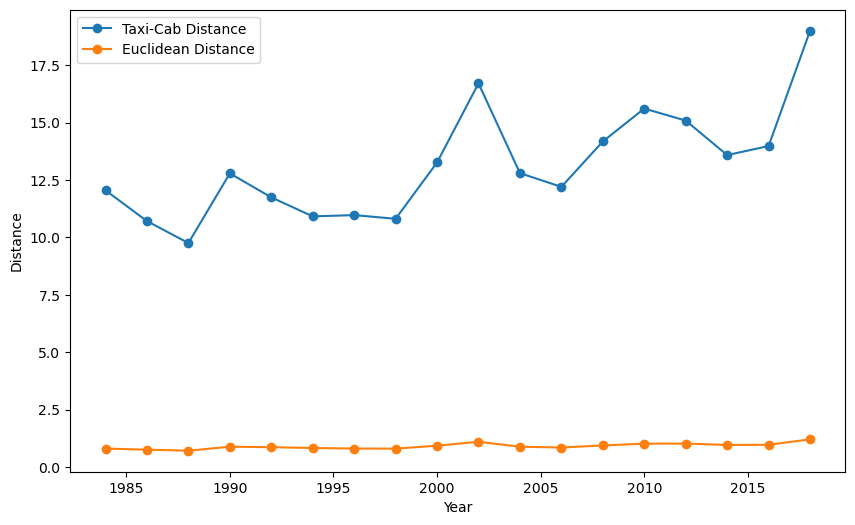

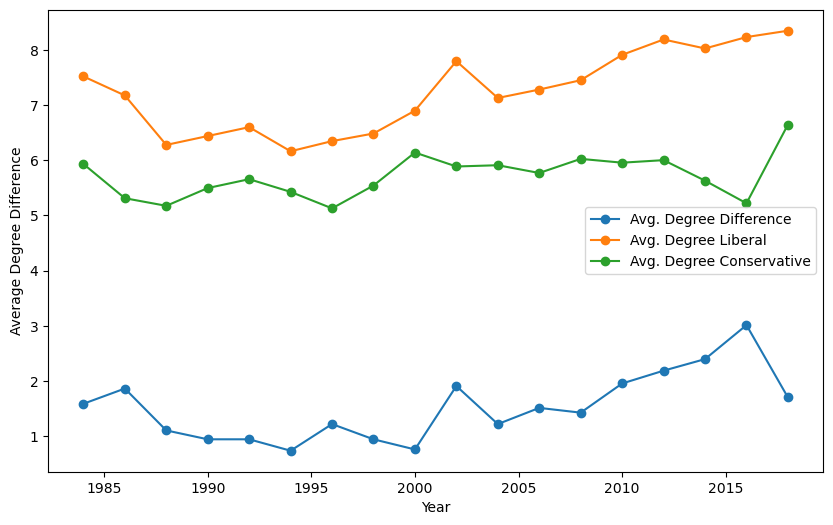

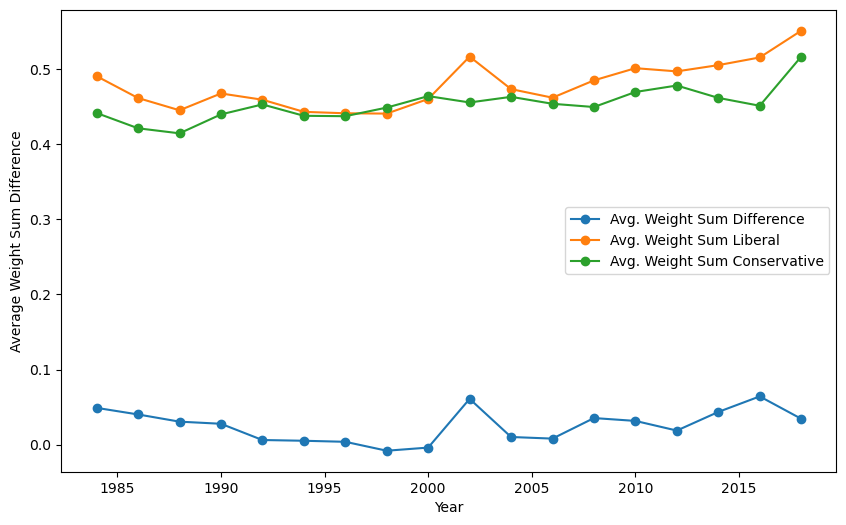

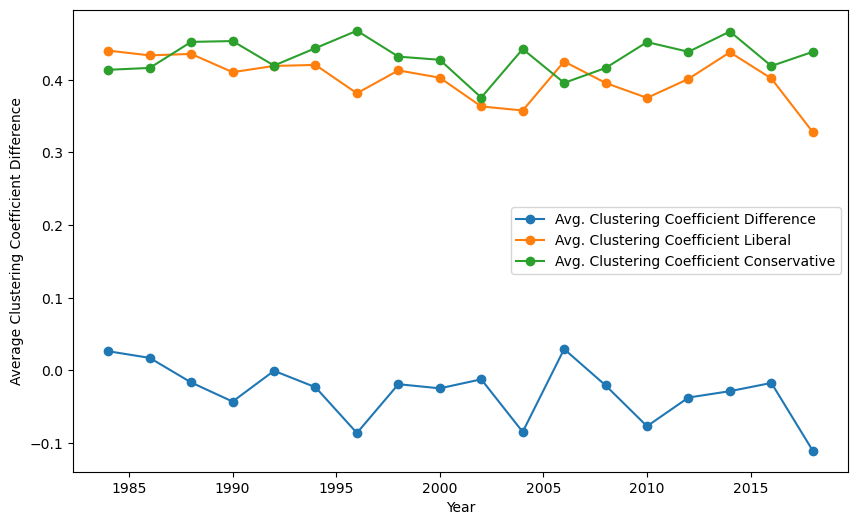

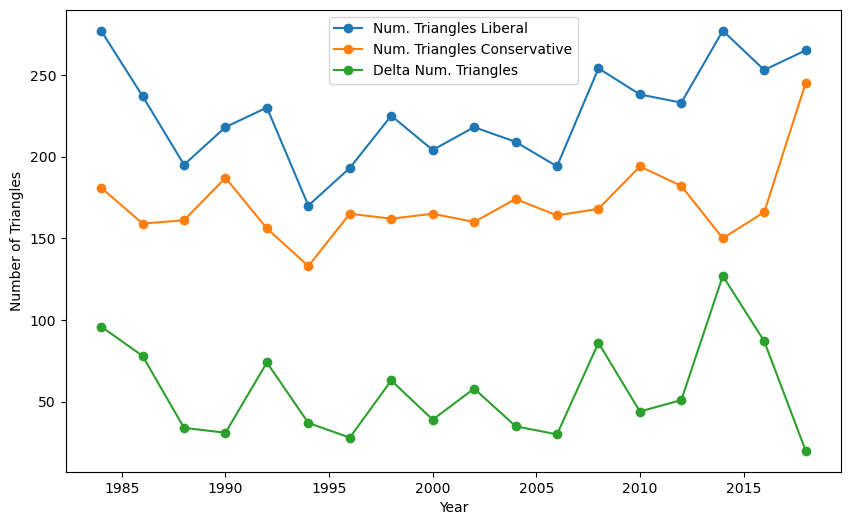

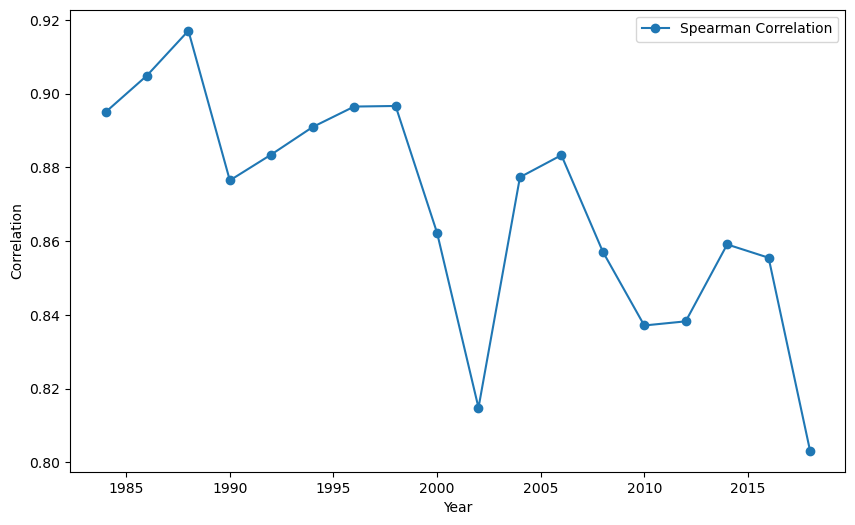

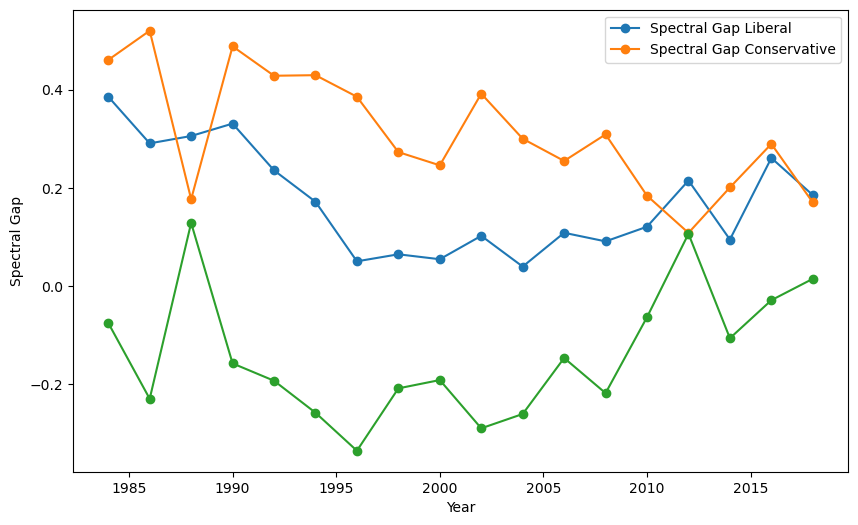

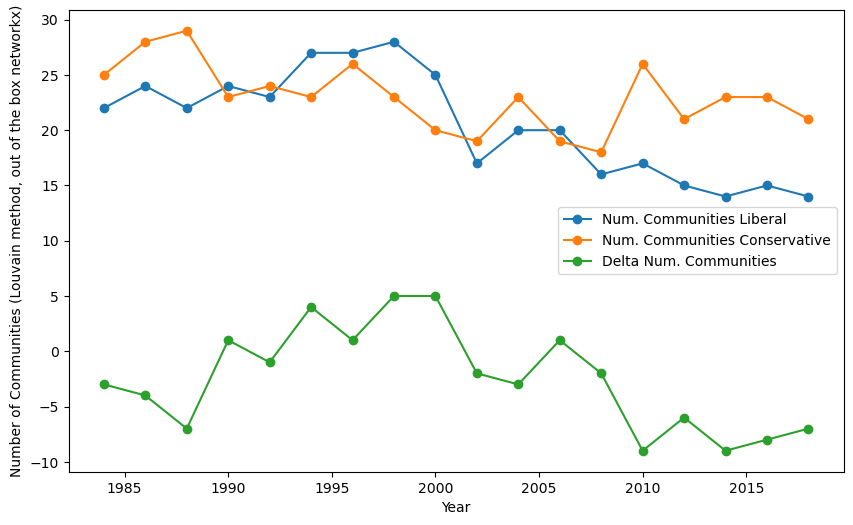

In [37]:
# Now we can perform some comparisons between the two networks.
from source_code.analyzers.matrix_compare import compare_matrices, print_comparison_results

taxi_cab_distances = {}
euclidean_distances = {}
jaccard_similarities = {}
avg_degree_liberal = {}
avg_degree_conservative = {}
avg_degree_diffs = {}
avg_weight_sums_liberal = {}
avg_weight_sums_conservative = {}
avg_weight_sum_diffs = {}
avg_clustering_coefficient_liberal = {}
avg_clustering_coefficient_conservative = {}
avg_clustering_coefficient_diffs = {}
num_triangles_liberal = {}
num_triangles_conservative = {}
num_triangles_diffs = {}
spearman_correlations = {}
pearson_correlations = {}
spectral_gap_liberal = {}
spectral_gap_conservative = {}
delta_spectral_gap = {}
num_communities_liberal = {}
num_communities_conservative = {}
delta_num_communities = {}

for year in range(1984, 2020, 2):
    comparison_results = compare_matrices(
        liberal_BNs[year],
        conservative_BNs[year],
        triangle_threshold=0.01
        )
    #print(f"Year: {year}, Euclidean distance: {comparison_results['euclidean_distance']}")
    taxi_cab_distances[year] = comparison_results['taxi_cab_distance']
    euclidean_distances[year] = comparison_results['euclidean_distance']
    avg_degree_diffs[year] = comparison_results['delta_avg_degree']
    avg_degree_liberal[year] = comparison_results['avg_degree']['matrix1']
    avg_degree_conservative[year] = comparison_results['avg_degree']['matrix2']
    avg_weight_sums_liberal[year] = comparison_results['avg_weight_sum']['matrix1']
    avg_weight_sums_conservative[year] = comparison_results['avg_weight_sum']['matrix2']
    avg_weight_sum_diffs[year] = comparison_results['delta_avg_weight_sum']
    avg_clustering_coefficient_liberal[year] = comparison_results['clustering_coefficient']['matrix1']
    avg_clustering_coefficient_conservative[year] = comparison_results['clustering_coefficient']['matrix2']
    avg_clustering_coefficient_diffs[year] = comparison_results['delta_clustering_coefficient']
    num_triangles_liberal[year] = comparison_results['calc_num_triangles']['matrix1']
    num_triangles_conservative[year] = comparison_results['calc_num_triangles']['matrix2']
    num_triangles_diffs[year] = comparison_results['delta_num_triangles']
    spearman_correlations[year] = comparison_results['spearman_correlation']
    pearson_correlations[year] = comparison_results['pearson_correlation']
    spectral_gap_liberal[year] = comparison_results['spectral_gap']['matrix1']
    spectral_gap_conservative[year] = comparison_results['spectral_gap']['matrix2']
    delta_spectral_gap[year] = comparison_results['delta_spectral_gap']
    num_communities_liberal[year] = comparison_results['num_communities']['matrix1']
    num_communities_conservative[year] = comparison_results['num_communities']['matrix2']
    delta_num_communities[year] = comparison_results['delta_num_communities']

# Plot the euclidean distances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(list(taxi_cab_distances.keys()), list(taxi_cab_distances.values()), marker='o')
plt.plot(list(euclidean_distances.keys()), list(euclidean_distances.values()), marker='o')
plt.legend(['Taxi-Cab Distance', 'Euclidean Distance'])
plt.xlabel('Year')
plt.ylabel('Distance')

plt.figure(figsize=(10, 6))
plt.plot(list(avg_degree_diffs.keys()), list(avg_degree_diffs.values()), marker='o')
plt.plot(list(avg_degree_liberal.keys()), list(avg_degree_liberal.values()), marker='o')
plt.plot(list(avg_degree_conservative.keys()), list(avg_degree_conservative.values()), marker='o')
plt.legend(['Avg. Degree Difference', 'Avg. Degree Liberal', 'Avg. Degree Conservative'])
plt.xlabel('Year')
plt.ylabel('Average Degree Difference')

plt.figure(figsize=(10, 6))
plt.plot(list(avg_weight_sum_diffs.keys()), list(avg_weight_sum_diffs.values()), marker='o')
plt.plot(list(avg_weight_sums_liberal.keys()), list(avg_weight_sums_liberal.values()), marker='o')
plt.plot(list(avg_weight_sums_conservative.keys()), list(avg_weight_sums_conservative.values()), marker='o')
plt.legend(['Avg. Weight Sum Difference', 'Avg. Weight Sum Liberal', 'Avg. Weight Sum Conservative'])
plt.xlabel('Year')
plt.ylabel('Average Weight Sum Difference')

plt.figure(figsize=(10, 6))
plt.plot(list(avg_clustering_coefficient_diffs.keys()), list(avg_clustering_coefficient_diffs.values()), marker='o')
plt.plot(list(avg_clustering_coefficient_liberal.keys()), list(avg_clustering_coefficient_liberal.values()), marker='o')
plt.plot(list(avg_clustering_coefficient_conservative.keys()), list(avg_clustering_coefficient_conservative.values()), marker='o')
plt.legend(['Avg. Clustering Coefficient Difference', 'Avg. Clustering Coefficient Liberal', 'Avg. Clustering Coefficient Conservative'])
plt.xlabel('Year')
plt.ylabel('Average Clustering Coefficient Difference')

plt.figure(figsize=(10, 6))
plt.plot(list(num_triangles_liberal.keys()), list(num_triangles_liberal.values()), marker='o')
plt.plot(list(num_triangles_conservative.keys()), list(num_triangles_conservative.values()), marker='o')
plt.plot(list(num_triangles_diffs.keys()), list(num_triangles_diffs.values()), marker='o')
plt.legend(['Num. Triangles Liberal', 'Num. Triangles Conservative', 'Delta Num. Triangles'])
plt.xlabel('Year')
plt.ylabel('Number of Triangles')

plt.figure(figsize=(10, 6))
plt.plot(list(pearson_correlations.keys()), list(pearson_correlations.values()), marker='o')
plt.legend(['Spearman Correlation', 'Pearson Correlation'])
plt.xlabel('Year')
plt.ylabel('Correlation')

plt.figure(figsize=(10, 6))
plt.plot(list(spectral_gap_liberal.keys()), list(spectral_gap_liberal.values()), marker='o')
plt.plot(list(spectral_gap_conservative.keys()), list(spectral_gap_conservative.values()), marker='o')
plt.plot(list(delta_spectral_gap.keys()), list(delta_spectral_gap.values()), marker='o')
plt.legend(['Spectral Gap Liberal', 'Spectral Gap Conservative'])
plt.xlabel('Year')
plt.ylabel('Spectral Gap')

plt.figure(figsize=(10, 6))
plt.plot(list(num_communities_liberal.keys()), list(num_communities_liberal.values()), marker='o')
plt.plot(list(num_communities_conservative.keys()), list(num_communities_conservative.values()), marker='o')
plt.plot(list(delta_num_communities.keys()), list(delta_num_communities.values()), marker='o')
plt.legend(['Num. Communities Liberal', 'Num. Communities Conservative', 'Delta Num. Communities'])
plt.xlabel('Year')
plt.ylabel('Number of Communities (Louvain method, out of the box networkx)')



In [ ]:
# What is happening in 2000????